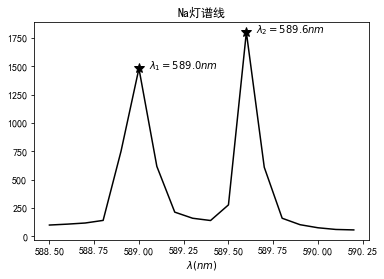

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

f=pd.read_csv('Na_light.csv')
plt.xlabel('$\lambda (nm)$')
plt.plot(f['lambda'],f['I'],'k')
plt.plot([589.0,589.6],[1480,1800,],'*k',markersize=10)
plt.text(589.0,1480,s='  $\lambda_1=589.0nm$')
plt.text(589.6,1800,s='  $\lambda_2=589.6nm$')
plt.title('Na灯谱线')
plt.savefig('Na_light.svg')

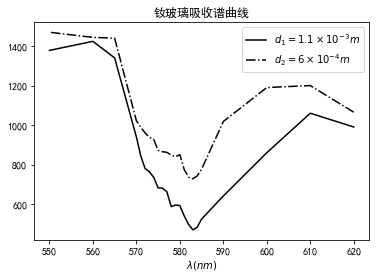

In [5]:
d1=1.1e-3;d2=6e-4
data3=pd.read_csv('data3.csv')
plt.xlabel('$\lambda (nm)$')
plt.title('钕玻璃吸收谱曲线')
plt.plot(data3['lambda'],data3['I1'],'-k',label=r'$d_1=1.1\times10^{-3}m$')
plt.plot(data3['lambda'],data3['I2'],'-.k',label=r'$d_2=6\times10^{-4}m$')
plt.legend()
plt.savefig('1.svg')

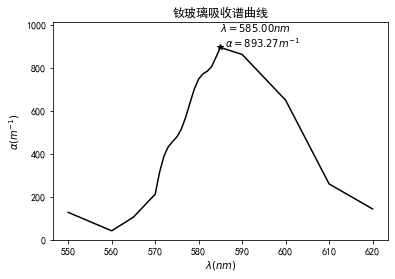

In [6]:
data3['lis']=(np.log(data3['I1'])-np.log(data3['I2']))/(d2-d1)
data3['lis']=signal.savgol_filter(data3['lis'],23,10)
peaks=signal.find_peaks(data3['lis'])
#print(data3[['lambda','lis']])
plt.plot(data3['lambda'],data3['lis'],'k')
plt.xlabel('$\lambda (nm)$')
plt.ylabel(r'$\alpha (m^{-1})$')
plt.title('钕玻璃吸收谱曲线')
plt.ylim(0,1010)
plt.plot(data3['lambda'][peaks[0][0]],data3['lis'][peaks[0][0]],'*k')
plt.text(data3['lambda'][peaks[0][0]],data3['lis'][peaks[0][0]],s='$\\lambda=%.2fnm$ \n $\\alpha=%.2fm^{-1}$'%(data3['lambda'][peaks[0][0]],data3['lis'][peaks[0][0]]))
plt.savefig('2.svg')